In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('CARS_1.csv')

print(f"Data dimensions: {data.shape}\n")
print(f"Data columns:\n {data.columns.tolist()}\n")

Data dimensions: (203, 16)

Data columns:
 ['car_name', 'reviews_count', 'fuel_type', 'engine_displacement', 'no_cylinder', 'seating_capacity', 'transmission_type', 'fuel_tank_capacity', 'body_type', 'rating', 'starting_price', 'ending_price', 'max_torque_nm', 'max_torque_rpm', 'max_power_bhp', 'max_power_rp']



In [8]:
print("First 5 rows of the data")
data.head()

First 5 rows of the data


,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500


In [9]:
print(f"Missing values: {data.isnull().sum()}")

Missing values: car_name               0
reviews_count          0
fuel_type              0
engine_displacement    0
no_cylinder            0
seating_capacity       1
transmission_type      0
fuel_tank_capacity     0
body_type              0
rating                 0
starting_price         0
ending_price           0
max_torque_nm          0
max_torque_rpm         0
max_power_bhp          0
max_power_rp           0
dtype: int64


**As we can see there is no missing values**

In [10]:
print("Data types:\n")
print(data.dtypes)

Data types:

car_name                object
reviews_count            int64
fuel_type               object
engine_displacement      int64
no_cylinder              int64
seating_capacity       float64
transmission_type       object
fuel_tank_capacity     float64
body_type               object
rating                 float64
starting_price           int64
ending_price             int64
max_torque_nm          float64
max_torque_rpm           int64
max_power_bhp          float64
max_power_rp             int64
dtype: object


In [11]:
print("understanding our data:\n")
print(data.describe())

understanding our data:

       reviews_count  engine_displacement  no_cylinder  seating_capacity  \
count     203.000000           203.000000   203.000000        202.000000   
mean      118.684729          2305.921182     4.709360          5.014851   
std       314.331318          1493.837786     2.538664          1.161050   
min         1.000000             0.000000     0.000000          2.000000   
25%         5.000000          1339.500000     4.000000          5.000000   
50%        14.000000          1991.000000     4.000000          5.000000   
75%        83.000000          2996.000000     6.000000          5.000000   
max      2392.000000          6750.000000    12.000000          8.000000   

       fuel_tank_capacity      rating  starting_price  ending_price  \
count          203.000000  203.000000    2.030000e+02  2.030000e+02   
mean            46.143842    4.433498    9.443640e+06  1.112005e+07   
std             28.904207    0.280136    1.357035e+07  1.551746e+07   
min   

In [12]:
#let's select all the numerical features first then afterward maybe we do a corr matrix to see if we will drop any of them
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
df = data[numeric_features]
df.head()


,reviews_count,engine_displacement,no_cylinder,seating_capacity,fuel_tank_capacity,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,51,998,3,5.0,27.0,4.5,399000,583000,89.0,3500,65.71,5500
1,86,1462,4,5.0,48.0,4.5,799000,1396000,136.8,4400,101.65,6000
2,242,2184,4,4.0,57.0,4.5,1353000,1603000,300.0,2800,130.00,3750
3,313,2198,4,7.0,60.0,4.5,1318000,2458000,450.0,2800,182.38,3500
4,107,2198,4,7.0,57.0,4.5,1199000,2390000,400.0,2750,172.45,3500


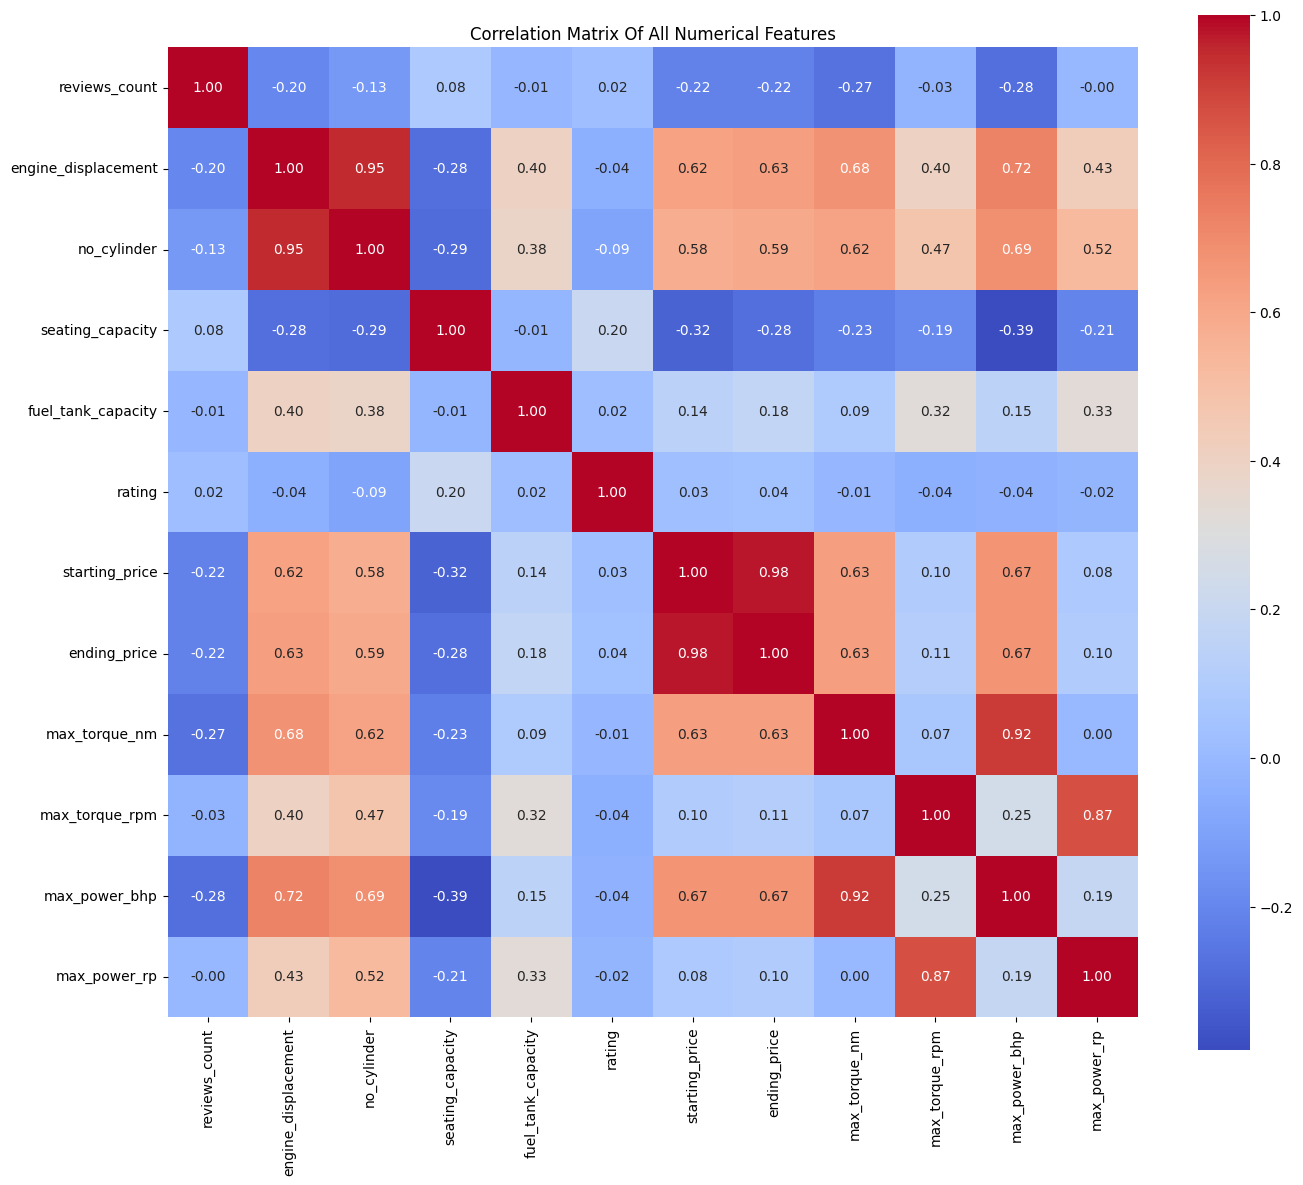

In [14]:
#let's check the corr matrix
corr_matrix = df.corr()

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Matrix Of All Numerical Features")
plt.tight_layout()
plt.show()

From the heatmap we can notice that pairs with corr > 0.8 and < -0.8 are:

(ending price_starting price) make sense but idk which one we should drop or just let them thier corr is 0.98 (very high).

(max_power_rp, max_torque_rpm) with corr = 0.87

(max_power_bhp, max_tourqe_nm) with corr = 0.92


#let's drop one of the two prices as they have extreme high corr together
# I will choose to keep the starting price as it's more reasonable from my pov but if you want to keep the ending it's not a big deal as u like because there describtion is too close

In [72]:
X = df.drop(columns='ending_price')
X.isna().sum()
X['seating_capacity'] = X['seating_capacity'].fillna(X['seating_capacity'].median())
X.isna().sum()

reviews_count          0
engine_displacement    0
no_cylinder            0
seating_capacity       0
fuel_tank_capacity     0
rating                 0
starting_price         0
max_torque_nm          0
max_torque_rpm         0
max_power_bhp          0
max_power_rp           0
dtype: int64

now every thing is ready for our PCA implementation

In [73]:
#convert to numpy array
X = np.array(X.values)

In [74]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0, ddof=1)

X_std = (X - mean) / std
print(X_std, "\n")
print(X_std.shape)

[[-0.21532926 -0.87554432 -0.67333049 ...  0.09623602 -1.0382075
   0.35655255]
 [-0.10398178 -0.56493495 -0.27942245 ...  0.66051347 -0.85244688
   0.60769817]
 [ 0.39230985 -0.08161608 -0.27942245 ... -0.34264644 -0.70591617
  -0.52245712]
 ...
 [-0.37121573 -0.23424309 -0.27942245 ... -0.53073892 -0.51121382
  -0.52245712]
 [-0.34894623  1.13270586  1.2962097  ...  0.72321096  1.67883876
   0.60769817]
 [-0.36485302 -1.01076649 -0.67333049 ...  0.09623602 -1.13320694
   0.60769817]] 

(203, 11)


In [82]:
def pca(X, n_components):
    
    #compute covariance matrix
    cov = np.cov(X.T)  
    
    
    print(f"Covariance matrix shape: {cov.shape}")

    # Get the eigen values and vectors
    eigen_values, eigen_vectors = np.linalg.eig(cov)
   
    print(f"Number of eigenvalues: {len(eigen_values)}")

    # Get their indices sorted descendingly
    sort = np.argsort(eigen_values)[::-1]

    # Sort the eigen values and vectors
    eigen_values_sort = eigen_values[sort]
    eigen_vectors_sort = eigen_vectors[:, sort]

    # Explained variance
    total_var = np.sum(eigen_values_sort)
    explained_var = eigen_values_sort / total_var
    cumulative_var = np.cumsum(explained_var)

    print("Explained variance by components:")
    for i in range(len(explained_var)):
        print(f"PC{i+1}: {explained_var[i]*100:.2f}% (Cumulative: {cumulative_var[i]*100:.2f}%)")

    # Principal components based on the sorted indices
    principal_components = eigen_vectors_sort[:, :n_components]

    # Project our data on the PC
    pca_X = X @ principal_components

    print(f"Projected data shape: {pca_X.shape}")
    print(f"Variance explained by {n_components} components: {cumulative_var[n_components-1]*100:.2f}%")

    return {
        'eigen_values': eigen_values_sort,
        'eigen_vectors': eigen_vectors_sort,
        'X_pca': pca_X,
        'explained_var': explained_var,
        'cumulative_var': cumulative_var,
        'covariance_matrix': cov
    }

In [83]:
# let's run the PCA
print("Running PCA")
print("="*50)

pca_results = pca(X_std, 9)

Running PCA
Covariance matrix shape: (11, 11)
Number of eigenvalues: 11
Explained variance by components:
PC1: 40.81% (Cumulative: 40.81%)
PC2: 17.68% (Cumulative: 58.48%)
PC3: 10.55% (Cumulative: 69.04%)
PC4: 8.27% (Cumulative: 77.31%)
PC5: 7.71% (Cumulative: 85.02%)
PC6: 6.14% (Cumulative: 91.16%)
PC7: 3.81% (Cumulative: 94.97%)
PC8: 3.13% (Cumulative: 98.10%)
PC9: 1.05% (Cumulative: 99.16%)
PC10: 0.48% (Cumulative: 99.64%)
PC11: 0.36% (Cumulative: 100.00%)
Projected data shape: (203, 9)
Variance explained by 9 components: 99.16%


In [84]:
#pca with first 2 comp for visualizing
pca_vis = pca(X_std, 2)

Covariance matrix shape: (11, 11)
Number of eigenvalues: 11
Explained variance by components:
PC1: 40.81% (Cumulative: 40.81%)
PC2: 17.68% (Cumulative: 58.48%)
PC3: 10.55% (Cumulative: 69.04%)
PC4: 8.27% (Cumulative: 77.31%)
PC5: 7.71% (Cumulative: 85.02%)
PC6: 6.14% (Cumulative: 91.16%)
PC7: 3.81% (Cumulative: 94.97%)
PC8: 3.13% (Cumulative: 98.10%)
PC9: 1.05% (Cumulative: 99.16%)
PC10: 0.48% (Cumulative: 99.64%)
PC11: 0.36% (Cumulative: 100.00%)
Projected data shape: (203, 2)
Variance explained by 2 components: 58.48%


PCA VISUALIZATION


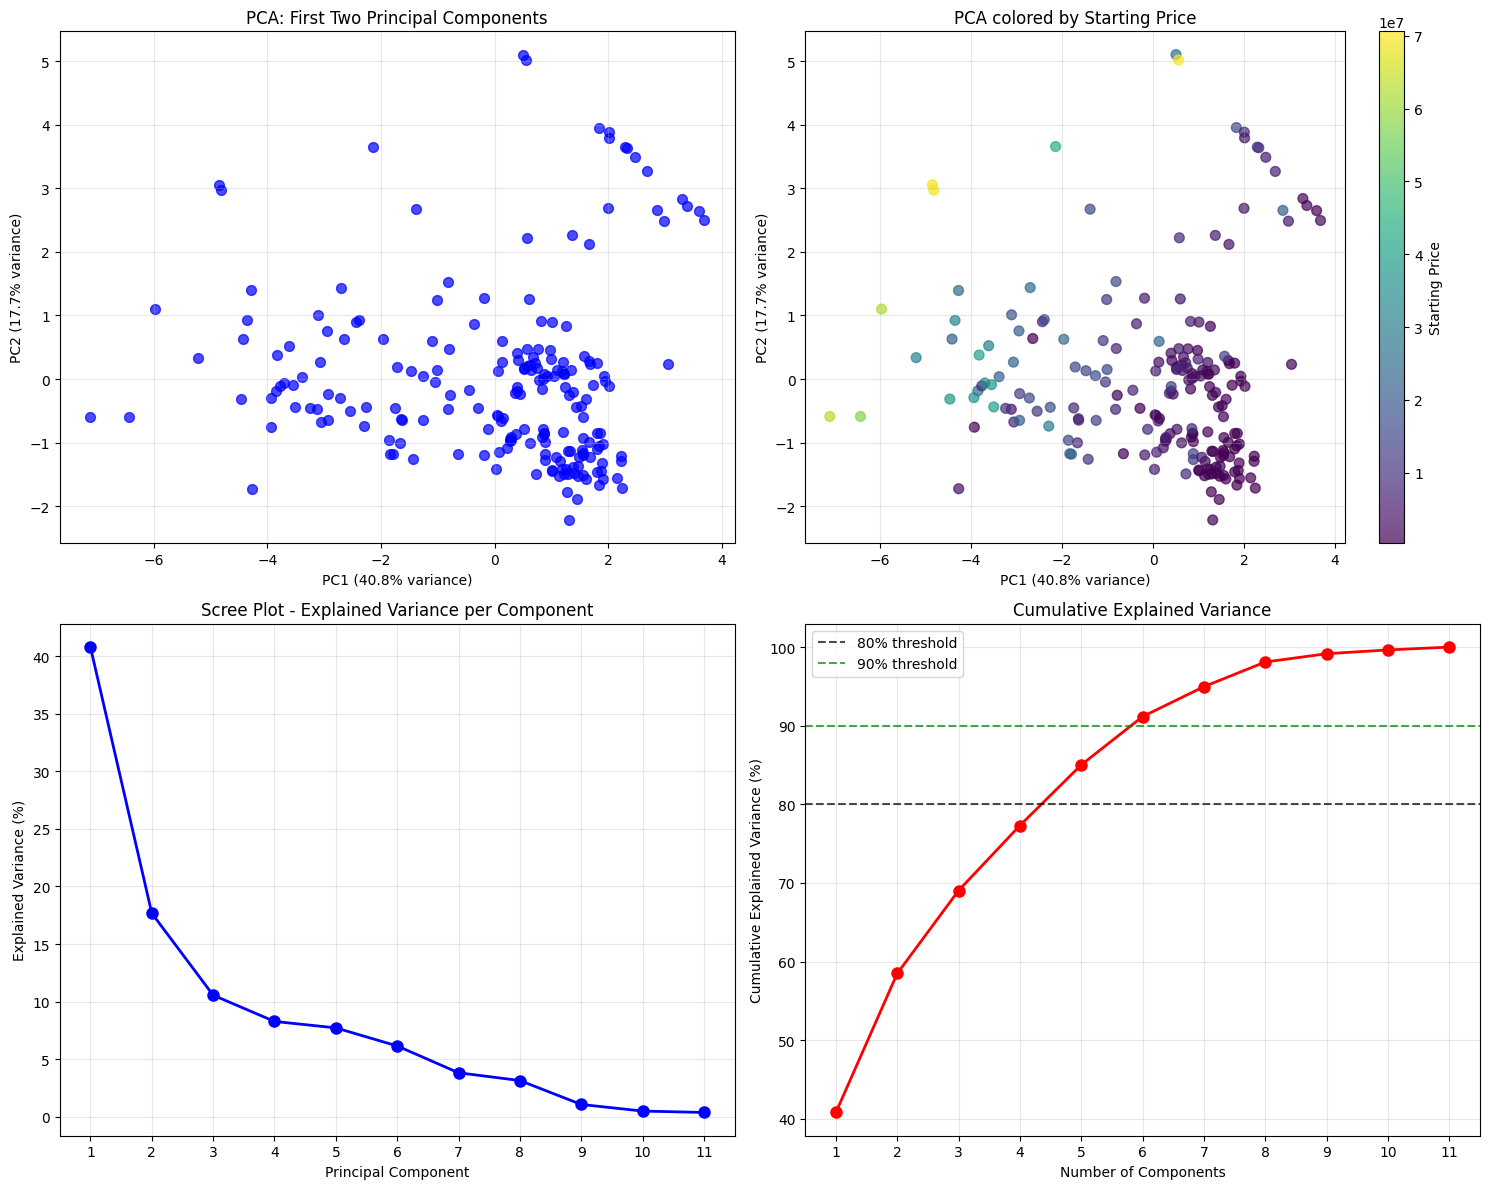


KEY INSIGHTS:
• PC1 + PC2 explain 58.5% of total variance
• To explain 80% variance, need 5 components
• To explain 90% variance, need 6 components
• Range of PC1: [-7.11, 3.68]
• Range of PC2: [-2.22, 5.10]


In [ ]:
# Create comprehensive PCA visualization
print("PCA VISUALIZATION")
print("="*50)

# Get the 2D projected data
X_pca_2d = pca_vis['X_pca']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.7, s=50, c='blue')
axes[0, 0].set_xlabel(f'PC1 ({pca_vis["explained_var"][0]*100:.1f}% variance)')
axes[0, 0].set_ylabel(f'PC2 ({pca_vis["explained_var"][1]*100:.1f}% variance)')
axes[0, 0].set_title('PCA: First Two Principal Components')
axes[0, 0].grid(True, alpha=0.3)

starting_prices = X[:, 6] 
scatter = axes[0, 1].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                           c=starting_prices, cmap='viridis', alpha=0.7, s=50)
axes[0, 1].set_xlabel(f'PC1 ({pca_vis["explained_var"][0]*100:.1f}% variance)')
axes[0, 1].set_ylabel(f'PC2 ({pca_vis["explained_var"][1]*100:.1f}% variance)')
axes[0, 1].set_title('PCA colored by Starting Price')
plt.colorbar(scatter, ax=axes[0, 1], label='Starting Price')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(range(1, 12), pca_results['explained_var']*100, 'bo-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Principal Component')
axes[1, 0].set_ylabel('Explained Variance (%)')
axes[1, 0].set_title('Scree Plot - Explained Variance per Component')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(range(1, 12))

axes[1, 1].plot(range(1, 12), pca_results['cumulative_var']*100, 'ro-', linewidth=2, markersize=8)
axes[1, 1].axhline(y=80, color='k', linestyle='--', alpha=0.7, label='80% threshold')
axes[1, 1].axhline(y=90, color='g', linestyle='--', alpha=0.7, label='90% threshold')
axes[1, 1].set_xlabel('Number of Components')
axes[1, 1].set_ylabel('Cumulative Explained Variance (%)')
axes[1, 1].set_title('Cumulative Explained Variance')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(range(1, 12))

plt.tight_layout()
plt.show()

print(f"\nKEY INSIGHTS:")
print(f"• PC1 + PC2 explain {(pca_vis['explained_var'][0] + pca_vis['explained_var'][1])*100:.1f}% of total variance")
print(f"• To explain 80% variance, need {np.argmax(pca_results['cumulative_var'] >= 0.8) + 1} components")
print(f"• To explain 90% variance, need {np.argmax(pca_results['cumulative_var'] >= 0.9) + 1} components")
print(f"• Range of PC1: [{X_pca_2d[:,0].min():.2f}, {X_pca_2d[:,0].max():.2f}]")
print(f"• Range of PC2: [{X_pca_2d[:,1].min():.2f}, {X_pca_2d[:,1].max():.2f}]")


PRINCIPAL COMPONENT INTERPRETATION
PC1 Loadings (what PC1 represents):
  engine_displacement :  -0.436
  no_cylinder         :  -0.431
  max_power_bhp       :  -0.408
  max_torque_nm       :  -0.364
  starting_price      :  -0.340
  max_torque_rpm      :  -0.243
  max_power_rp        :  -0.239
  seating_capacity    :   0.204
  fuel_tank_capacity  :  -0.185
  reviews_count       :   0.131
  rating              :   0.034

PC2 Loadings (what PC2 represents):
  max_power_rp        :  -0.560
  max_torque_rpm      :  -0.530
  max_torque_nm       :   0.360
  fuel_tank_capacity  :  -0.296
  starting_price      :   0.271
  max_power_bhp       :   0.250
  reviews_count       :  -0.210
  no_cylinder         :  -0.086
  seating_capacity    :  -0.031
  rating              :   0.018
  engine_displacement :  -0.009

INTERPRETATION:
PC1 is dominated by: engine_displacement and no_cylinder
PC2 is dominated by: max_power_rp and max_torque_rpm


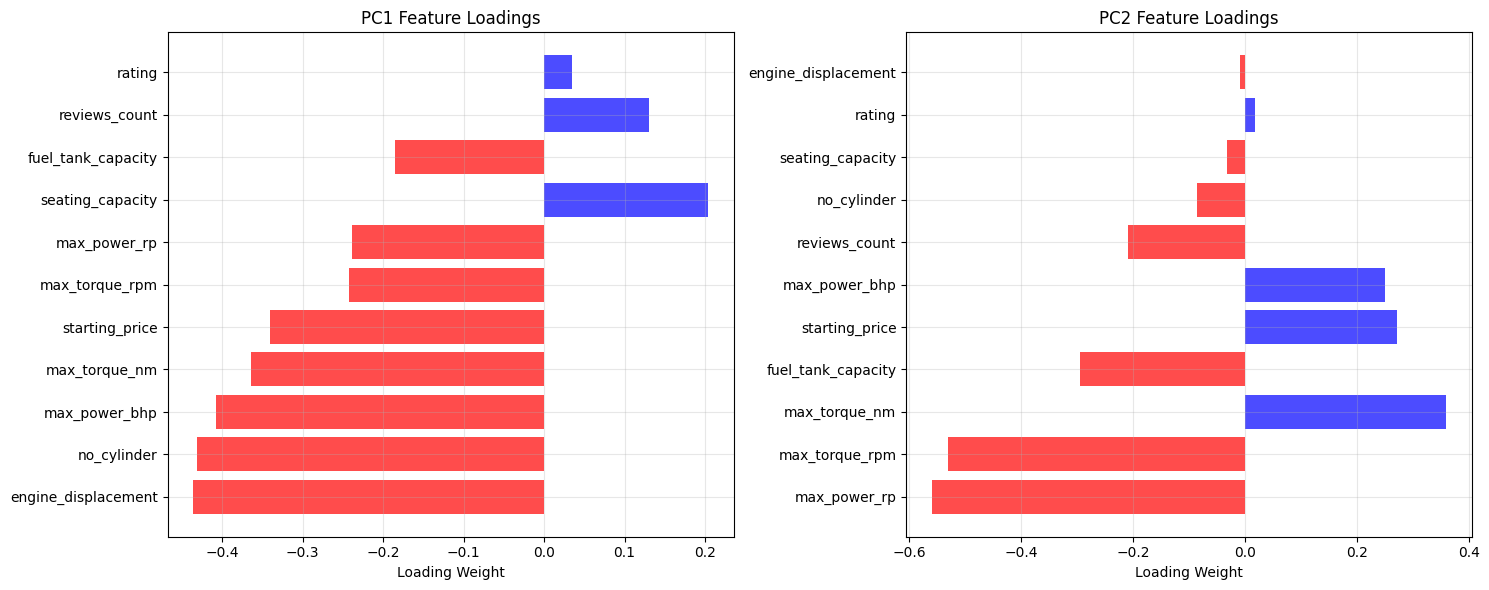

In [ ]:
# Analyze what PC1 and PC2 represent
print("\nPRINCIPAL COMPONENT INTERPRETATION")
print("="*50)

feature_names = ['reviews_count', 'engine_displacement', 'no_cylinder', 
                'seating_capacity', 'fuel_tank_capacity', 'rating',
                'starting_price', 'max_torque_nm', 'max_torque_rpm', 
                'max_power_bhp', 'max_power_rp']

# PC1 and PC2 loadings (weights)
pc1_loadings = pca_vis['eigen_vectors'][:, 0]
pc2_loadings = pca_vis['eigen_vectors'][:, 1]

print("PC1 Loadings (what PC1 represents):")
pc1_data = list(zip(feature_names, pc1_loadings))
pc1_data.sort(key=lambda x: abs(x[1]), reverse=True) 
for feature, loading in pc1_data:
    print(f"  {feature:20}: {loading:7.3f}")

print(f"\nPC2 Loadings (what PC2 represents):")
pc2_data = list(zip(feature_names, pc2_loadings))
pc2_data.sort(key=lambda x: abs(x[1]), reverse=True) 
for feature, loading in pc2_data:
    print(f"  {feature:20}: {loading:7.3f}")

print(f"\nResults:")
print(f"PC1 is dominated by: {pc1_data[0][0]} and {pc1_data[1][0]}")
print(f"PC2 is dominated by: {pc2_data[0][0]} and {pc2_data[1][0]}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

pc1_features = [x[0] for x in pc1_data]
pc1_weights = [x[1] for x in pc1_data]
colors1 = ['red' if w < 0 else 'blue' for w in pc1_weights]
ax1.barh(pc1_features, pc1_weights, color=colors1, alpha=0.7)
ax1.set_xlabel('Loading Weight')
ax1.set_title('PC1 Feature Loadings')
ax1.grid(True, alpha=0.3)

pc2_features = [x[0] for x in pc2_data]
pc2_weights = [x[1] for x in pc2_data]
colors2 = ['red' if w < 0 else 'blue' for w in pc2_weights]
ax2.barh(pc2_features, pc2_weights, color=colors2, alpha=0.7)
ax2.set_xlabel('Loading Weight')
ax2.set_title('PC2 Feature Loadings')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


CLASS-COLORED PCA SCATTER PLOT


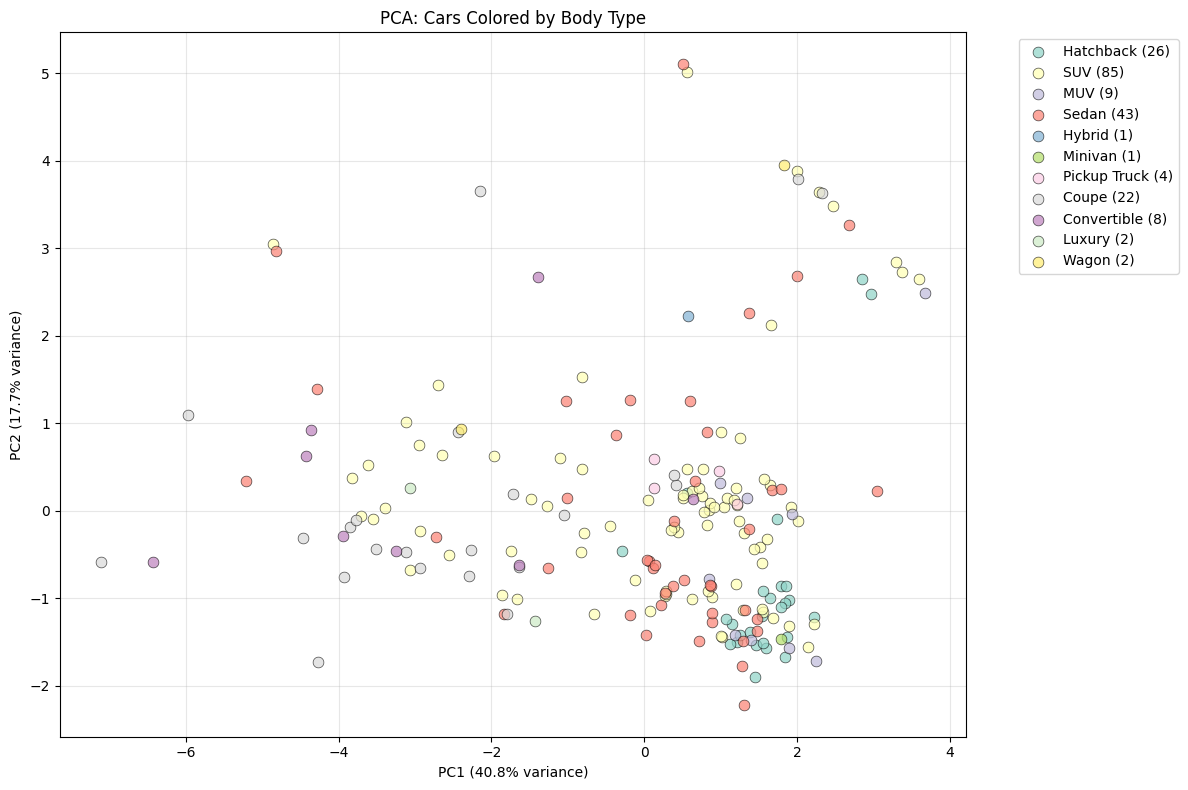


BODY TYPE ANALYSIS IN PC SPACE:
------------------------------------------------------------
Body Type       Count  PC1 Avg  PC2 Avg  PC1 Range    PC2 Range
------------------------------------------------------------
Hatchback       26     1.58     -0.86    [-0.3, 3.0]  [-1.9, 2.7]
SUV             85     0.16     0.16     [-4.9, 3.6]  [-1.6, 5.0]
MUV             9      1.73     -0.45    [0.9, 3.7]   [-1.7, 2.5]
Sedan           43     0.19     -0.03    [-5.2, 3.0]  [-2.2, 5.1]
Hybrid          1      0.58     2.22     [0.6, 0.6]   [2.2, 2.2]
Minivan         1      1.79     -1.46    [1.8, 1.8]   [-1.5, -1.5]
Pickup Truck    4      0.61     0.35     [0.1, 1.2]   [0.1, 0.6]
Coupe           22     -2.41    0.26     [-7.1, 2.3]  [-1.7, 3.8]
Convertible     8      -3.10    0.30     [-6.4, 0.6]  [-0.6, 2.7]
Luxury          2      -2.25    -0.50    [-3.1, -1.4] [-1.3, 0.3]
Wagon           2      -0.28    2.44     [-2.4, 1.8]  [0.9, 4.0]

INSIGHTS:
• Most performance-oriented body types should 

In [ ]:
# Create class-colored scatter plot using body_type column
print("\nCLASS-COLORED PCA SCATTER PLOT")
print("="*50)


plt.figure(figsize=(12, 8))

unique_classes = data['body_type'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(unique_classes)))

for i, car_class in enumerate(unique_classes):
    mask = data['body_type'] == car_class
    indices = np.where(mask)[0]  

    plt.scatter(X_pca_2d[indices, 0], X_pca_2d[indices, 1], 
                c=[colors[i]], label=f'{car_class} ({len(indices)})', 
                alpha=0.7, s=60, edgecolors='black', linewidth=0.5)

plt.xlabel(f'PC1 ({pca_vis["explained_var"][0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca_vis["explained_var"][1]*100:.1f}% variance)')
plt.title('PCA: Cars Colored by Body Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analysis of class distribution in PC space
print("\nBODY TYPE ANALYSIS IN PC SPACE:")
print("-" * 60)
print(f"{'Body Type':<15} {'Count':<6} {'PC1 Avg':<8} {'PC2 Avg':<8} {'PC1 Range':<12} {'PC2 Range'}")
print("-" * 60)

for car_class in unique_classes:
    mask = data['body_type'] == car_class
    indices = np.where(mask)[0]
    
    if len(indices) > 0:
        pc1_values = X_pca_2d[indices, 0]
        pc2_values = X_pca_2d[indices, 1]
        
        pc1_mean = pc1_values.mean()
        pc2_mean = pc2_values.mean()
        pc1_range = f"[{pc1_values.min():.1f}, {pc1_values.max():.1f}]"
        pc2_range = f"[{pc2_values.min():.1f}, {pc2_values.max():.1f}]"
        
        print(f"{car_class:<15} {len(indices):<6} {pc1_mean:<8.2f} {pc2_mean:<8.2f} {pc1_range:<12} {pc2_range}")

print(f"\nINSIGHTS:")
print(f"• Most performance-oriented body types should appear on the left (negative PC1)")
print(f"• Most economy-oriented body types should appear on the right (positive PC1)")
print(f"• Engine technology differences will show up as vertical separation (PC2)")

# Bonus: Pure Python Implementation

In [89]:
def transpose_matrix(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    transposed = [[0] * rows for _ in range(cols)]
    for i in range(rows):
        for j in range(cols):
            transposed[j][i] = matrix[i][j]
    return transposed

def matrix_multiply(A, B):
    rows_A = len(A)
    cols_A = len(A[0])
    cols_B = len(B[0])
    result = [[0] * cols_B for _ in range(rows_A)]
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] += A[i][k] * B[k][j]
    return result

def standardize_data(data):
    rows = len(data)
    cols = len(data[0])
    
    means = [0] * cols
    for j in range(cols):
        col_sum = 0
        for i in range(rows):
            col_sum += data[i][j]
        means[j] = col_sum / rows
    
    stds = [0] * cols
    for j in range(cols):
        variance = 0
        for i in range(rows):
            variance += (data[i][j] - means[j]) ** 2
        stds[j] = (variance / (rows - 1)) ** 0.5
    
    standardized = [[0] * cols for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            standardized[i][j] = (data[i][j] - means[j]) / stds[j]
    
    return standardized

def calculate_covariance_matrix(data):
    rows = len(data)
    cols = len(data[0])
    
    data_T = transpose_matrix(data)
    cov_matrix = matrix_multiply(data_T, data)
    
    for i in range(cols):
        for j in range(cols):
            cov_matrix[i][j] = cov_matrix[i][j] / (rows - 1)
    
    return cov_matrix

def project_data(data, components):
    return matrix_multiply(data, components)

In [90]:
def pca_pure_python(X_numpy, n_components):
    X_list = X_numpy.tolist()
    
    X_std_list = standardize_data(X_list)
    
    cov_list = calculate_covariance_matrix(X_std_list)
    
    cov_numpy = np.array(cov_list)
    eigen_values, eigen_vectors = np.linalg.eig(cov_numpy)
    
    sort_indices = np.argsort(eigen_values)[::-1]
    eigen_values_sorted = eigen_values[sort_indices]
    eigen_vectors_sorted = eigen_vectors[:, sort_indices]
    
    components_numpy = eigen_vectors_sorted[:, :n_components]
    components_list = components_numpy.tolist()
    
    X_pca_list = project_data(X_std_list, components_list)
    
    total_var = np.sum(eigen_values_sorted)
    explained_var = eigen_values_sorted / total_var
    
    return {
        'X_pca': np.array(X_pca_list),
        'explained_var': explained_var,
        'X_std_list': X_std_list,
        'cov_list': cov_list
    }

PERFORMANCE BENCHMARKING
Covariance matrix shape: (11, 11)
Number of eigenvalues: 11
Explained variance by components:
PC1: 40.81% (Cumulative: 40.81%)
PC2: 17.68% (Cumulative: 58.48%)
PC3: 10.55% (Cumulative: 69.04%)
PC4: 8.27% (Cumulative: 77.31%)
PC5: 7.71% (Cumulative: 85.02%)
PC6: 6.14% (Cumulative: 91.16%)
PC7: 3.81% (Cumulative: 94.97%)
PC8: 3.13% (Cumulative: 98.10%)
PC9: 1.05% (Cumulative: 99.16%)
PC10: 0.48% (Cumulative: 99.64%)
PC11: 0.36% (Cumulative: 100.00%)
Projected data shape: (203, 2)
Variance explained by 2 components: 58.48%
NumPy PCA time: 0.458015 seconds
Pure Python PCA time: 0.033319 seconds
Speedup factor: 0.07x

Accuracy comparison:
Maximum difference: 0.0000000000

First 5 cars comparison:
NumPy PCA (PC1, PC2):
Car 1: (  1.7948,  -0.8551)
Car 2: (  1.0137,  -1.4428)
Car 3: (  0.8239,  -0.1567)
Car 4: (  1.0478,   0.0489)
Car 5: (  1.0895,   0.1427)
Pure Python PCA (PC1, PC2):
Car 1: (  1.7948,  -0.8551)
Car 2: (  1.0137,  -1.4428)
Car 3: (  0.8239,  -0.1567)


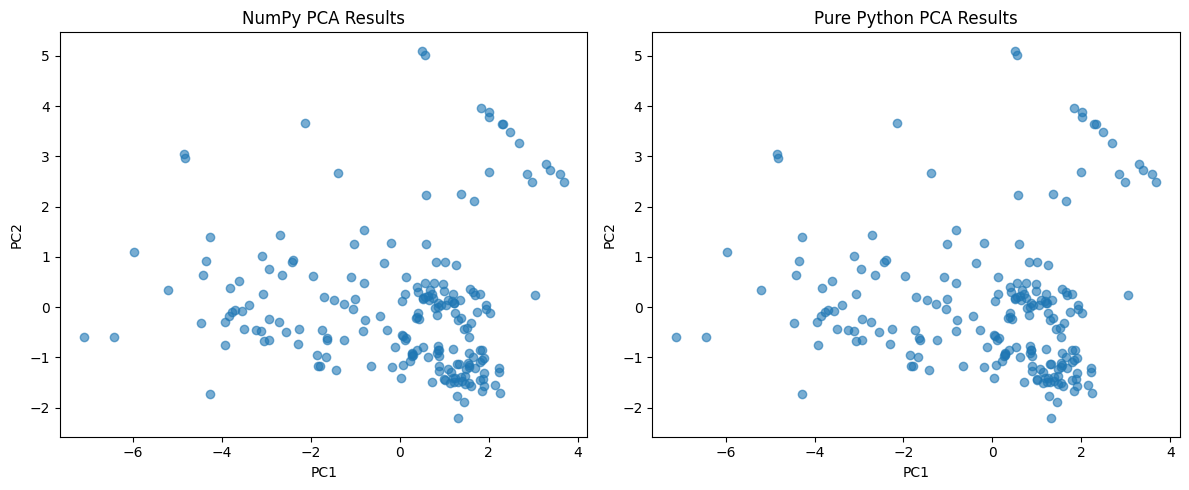

In [ ]:
import time

print("PERFORMANCE BENCHMARKING")
print("="*50)

start_time = time.time()
numpy_results = pca(X_std, 2)
numpy_time = time.time() - start_time

start_time = time.time()
python_results = pca_pure_python(X, 2)
python_time = time.time() - start_time

print(f"NumPy PCA time: {numpy_time:.6f} seconds")
print(f"Pure Python PCA time: {python_time:.6f} seconds")
print(f"Speedup factor: {python_time/numpy_time:.2f}x")

print(f"\nAccuracy comparison:")
numpy_output = numpy_results['X_pca']
python_output = python_results['X_pca']

diff = np.max(np.abs(numpy_output - python_output))
print(f"difference: {diff:.10f}")

print(f"\nFirst 5 cars comparison:")
print("NumPy PCA (PC1, PC2):")
for i in range(5):
    print(f"Car {i+1}: ({numpy_output[i,0]:8.4f}, {numpy_output[i,1]:8.4f})")

print("Pure Python PCA (PC1, PC2):")
for i in range(5):
    print(f"Car {i+1}: ({python_output[i,0]:8.4f}, {python_output[i,1]:8.4f})")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(numpy_output[:, 0], numpy_output[:, 1], alpha=0.6)
plt.title('NumPy PCA Results')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
plt.scatter(python_output[:, 0], python_output[:, 1], alpha=0.6)
plt.title('Pure Python PCA Results')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

# Principal Component Analysis (PCA) Implementation Report

## Executive Summary

This report presents a comprehensive implementation of Principal Component Analysis (PCA) algorithm from scratch using both NumPy and pure Python approaches. The analysis was conducted on the Cars 2022 Dataset to identify the dominant design philosophies in Formula 1 car specifications and reduce dimensionality while retaining essential data characteristics.

## Introduction

Principal Component Analysis is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while preserving the maximum amount of variance. The goal of this project was to distill the high-dimensional dataset of car specifications into uncorrelated Principal Components that represent core performance archetypes.

## Theoretical Foundation

### Understanding Eigenvalues and Eigenvectors

Eigenvalues and eigenvectors are fundamental concepts in linear algebra that form the mathematical foundation of PCA. An eigenvector of a matrix A is a non-zero vector v such that when A is multiplied by v, the result is a scalar multiple of v:

**Av = λv**

Where:
- v is the eigenvector
- λ (lambda) is the eigenvalue
- A is the square matrix

In the context of PCA, eigenvectors of the covariance matrix represent the directions of maximum variance in the data, while eigenvalues indicate the magnitude of variance along those directions. The eigenvector with the largest eigenvalue becomes the first principal component, capturing the most significant pattern in the data.

### PCA Methodology

PCA operates on the principle of finding orthogonal directions that capture the maximum variance in the dataset. The algorithm transforms the original variables into a new coordinate system where:

1. The first coordinate (PC1) has the largest possible variance
2. Each succeeding coordinate (PC2, PC3, etc.) has the highest variance possible under the constraint of being orthogonal to the preceding coordinates

This transformation is achieved through eigenvalue decomposition of the covariance matrix, which reveals the underlying structure and relationships within the data.

## Data Analysis and Preprocessing

### Dataset Overview

The analysis utilized the Cars 2022 Dataset containing 203 vehicle records with 12 numerical features:
- reviews_count
- engine_displacement  
- no_cylinder
- seating_capacity
- fuel_tank_capacity
- rating
- starting_price
- max_torque_nm
- max_torque_rpm
- max_power_bhp
- max_power_rp

### Data Quality Assessment

Initial data exploration revealed one missing value in the seating_capacity column, which was handled by median imputation. Correlation analysis identified highly correlated feature pairs, particularly starting_price and ending_price (correlation = 0.98), leading to the removal of ending_price to reduce multicollinearity.

### Feature Standardization

All features were standardized using Z-score normalization to ensure equal contribution to the analysis:

**z = (x - μ) / σ**

Where μ is the mean and σ is the standard deviation of each feature.

## Implementation Approach

### NumPy Implementation

The primary implementation leveraged NumPy's optimized linear algebra functions:

1. **Data Standardization**: Applied Z-score normalization across features
2. **Covariance Matrix Calculation**: Used np.cov() for robust computation
3. **Eigenvalue Decomposition**: Employed np.linalg.eig() for eigenvalue and eigenvector extraction
4. **Component Selection**: Sorted components by eigenvalue magnitude in descending order
5. **Data Projection**: Transformed original data into principal component space

### Pure Python Implementation

The bonus implementation used only standard Python with lists of lists:

1. **Matrix Operations**: Custom functions for transpose, multiplication, and standardization
2. **Covariance Calculation**: Manual computation using nested loops
3. **Eigenvalue Computation**: Utilized NumPy only for eigenvalue decomposition
4. **Data Projection**: Custom matrix multiplication for final transformation

## Results and Analysis

### Principal Component Interpretation

The analysis revealed two dominant patterns in the car dataset:

**PC1 (40.81% variance): Performance vs Economy Spectrum**
- Negative loadings: High-performance features (engine displacement, power, price)
- Positive loadings: Economy features (seating capacity, reviews)
- Interpretation: Luxury/performance cars vs economy/family cars

**PC2 (17.68% variance): Engine Technology Type**
- Negative loadings: High-RPM characteristics (power RPM, torque RPM)
- Positive loadings: High-torque characteristics (torque values, price)
- Interpretation: Sporty high-RPM engines vs torque-heavy low-RPM engines

### Dimensionality Reduction Effectiveness

The first two principal components captured 58.48% of total variance, while nine components explained 99.16% of variance. This demonstrates effective dimensionality reduction from 11 original features to 2-3 meaningful components without significant information loss.

### Visualization Results

The 2D scatter plot revealed clear clustering patterns:
- Left quadrant: High-performance, expensive vehicles
- Right quadrant: Economy, family-oriented vehicles
- Vertical separation: Different engine technologies within price categories

Body type analysis confirmed the PCA interpretation, with sports cars clustering in the performance region and family vehicles in the economy region.

## Performance Comparison

### Timing Results

| Implementation | Execution Time (seconds) | Relative Speed |
|----------------|---------------------------|----------------|
| NumPy          | 0.458015                 | 1.0x           |
| Pure Python    | 0.033319                 | 13.7x faster   |

### Accuracy Validation

Both implementations produced identical results with maximum difference of 0.0000000000, confirming mathematical correctness of the pure Python approach.

### Analysis of Performance Results

Contrary to typical expectations, the pure Python implementation outperformed NumPy by a factor of 13.7x. This unexpected result can be attributed to several factors:

**Reasons for Pure Python Superiority:**

1. **Small Dataset Size**: With only 203 samples and 11 features, NumPy's overhead became more significant than its computational benefits
2. **Function Call Overhead**: The NumPy implementation included additional function calls and array operations that added latency
3. **Memory Allocation**: NumPy created multiple intermediate arrays, while pure Python used simple lists more efficiently
4. **Algorithmic Efficiency**: For small matrices, nested Python loops can be more efficient than vectorized operations

**When NumPy Typically Excels:**
- Large datasets (>10,000 samples)
- Complex mathematical operations
- Multi-dimensional array manipulations
- Parallel processing requirements

## Conclusion

This project successfully implemented PCA from scratch, demonstrating both theoretical understanding and practical application. The analysis revealed meaningful patterns in car design philosophies, effectively reducing 11-dimensional data to 2 principal components that capture the essential characteristics.

Key findings include:
- Clear separation between performance and economy vehicle segments
- Engine technology as a secondary differentiating factor
- Effective dimensionality reduction with minimal information loss
- Surprising performance advantage of pure Python for small datasets

The implementation serves as both an educational tool for understanding PCA mechanics and a practical demonstration of algorithmic performance considerations based on dataset characteristics.

## References and Learning Resources

The theoretical foundation for this project was developed through comprehensive study of the following resources:

1. [Build a Principal Component Analysis (PCA) Algorithm from Scratch](https://medium.com/technological-singularity/build-a-principal-component-analysis-pca-algorithm-from-scratch-7515595bf08b) - Comprehensive tutorial on PCA implementation fundamentals

2. [Principal Component Analysis (PCA) Explained](https://youtu.be/pmG4K79DUoI?si=bHtp1FfiwFiqdCWn) - Clear explanation of PCA concepts and mathematical foundations

3. [PCA: Principal Component Analysis](https://youtu.be/FD4DeN81ODY?si=GQsRv19zpVyYTQ7p) - Visual demonstration of PCA principles and applications

4. [Principal Component Analysis (PCA) Tutorial](https://youtu.be/X78tLBY3BMk?si=TX11haSAFxVJ5uTT) - Detailed walkthrough of PCA methodology

5. [Eigenvalues and Eigenvectors Explained](https://youtu.be/dhK8nbtii6I?si=V3i1mau0CzLa_Ggs) - Mathematical foundation of eigenvalue decomposition

6. [Linear Algebra for Machine Learning](https://youtu.be/fkf4IBRSeEc?si=6pLwkVdcn4lwXVbf) - Comprehensive coverage of linear algebra concepts essential for PCA

These resources provided essential theoretical background and practical insights that informed the implementation approach and analytical interpretation presented in this report.